<div style='color: #666666;
           background-color: #e6ac00;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: Courier New;'>
Importing Data
<a class="anchor" id="1"></a> 

In [169]:
# importing libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

In [170]:
pd.set_option('display.max_columns', None) 
plt.style.use('seaborn')
sns.set_palette(['#a67c00','#bf9b30','#ffbf00','#ffcf40','#ffdc73'])

In [171]:
import warnings 
warnings.filterwarnings('ignore')

In [172]:
# reading data
train_data = pd.read_csv('train_dataset.csv')
test_data = pd.read_csv('test_dataset.csv') 

In [173]:
# Number of rows in train and test data 
print(f"Number of rows in training data: {train_data.shape[0]}")
print(f"Number of rows in test data: {test_data.shape[0]}")

Number of rows in training data: 6823
Number of rows in test data: 2000


<div style='color: #666666;
           background-color: #e6ac00;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: Courier New;'>
Data preprocessing & Cleaning
<a class="anchor" id="1"></a> 

<span style='color: #e6ac00;
           font-size: 120%;
           border-radius:10px;
           text-align:left;
           font-weight:600;
           padding-left: 20px;
           padding-right:20px;
           font-family: "Courier New";'>
Data overview & Descriptive statistics

In [174]:
train_data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,Jesse James (Lucky Luke),"Rene Goscinny, Jean Tarbary","Paperback,– Import, 1 Apr 2008",5.0 out of 5 stars,1 customer review,Cowboy Lucky Luke upholds the law of the Wild ...,Comics & Mangas (Books),Comics & Mangas,2.292
1,A Storm of Swords 2: Blood and Gold (A Song of...,George R. R. Martin,"Paperback,– 27 Mar 2014",4.5 out of 5 stars,474 customer reviews,HBO’s hit series A GAME OF THRONES is based on...,Action & Adventure (Books),"Crime, Thriller & Mystery",4.800
2,"Mastering Copperplate Calligraphy (Lettering, ...",Eleanor Winters,"Paperback,– 28 May 2000",4.9 out of 5 stars,15 customer reviews,Developed by English handwriting masters in th...,"Handicrafts, Decorative Arts & Crafts (Books)","Arts, Film & Photography",10.500
3,I Am Zlatan Ibrahimovic,Zlatan Ibrahimovic,"Paperback,– 24 Sep 2013",4.8 out of 5 stars,52 customer reviews,"I AM ZLATAN - the explosive, critically-acclai...",Biographies & Autobiographies (Books),Sports,5.520
4,Bought For The Billionaire's Revenge (Modern),Connelly Clare,"Paperback,– 28 Jul 2017",4.5 out of 5 stars,2 customer reviews,Sold to the ruthless tycoon!\n\nInnocent socia...,Romance (Books),Romance,4.776


In [175]:
train_data.tail()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
6818,Night of the Bold (Kings and Sorcerers--Book 6),Morgan Rice,"Nov 6, 2015",4.3 out of 5 stars,283 customer reviews,“An action packed fantasy sure to please fans ...,none,NaN,22.47000
6819,Sword of Destiny: Witcher 2: Tales of the Witcher,Andrzej Sapkowski,"May 21, 2015",4.8 out of 5 stars,383 customer reviews,"Geralt is a witcher, a man whose magic powers,...",none,NaN,43.28000
6820,An Indian Pilgrim: An Unfinished Autobiography,Bose Subhas Chandra,"Paperback,– 1 Jun 1997",4.5 out of 5 stars,16 customer reviews,This autobiography supplies the material with ...,Linguistics (Books),"Language, Linguistics & Writing",5.77932
6821,The Complete Idiot's Guide to Music Compositio...,Michael Miller,"Paperback,– 4 Oct 2005",5.0 out of 5 stars,1 customer review,Write the songs that make the whole world sing...,Writing Guides (Books),Humour,17.02800
6822,I'll Give You the Sun,Jandy Nelson,"Paperback,– Apr 2015",4.7 out of 5 stars,70 customer reviews,Coming from the acclaimed author of ‘The Sky i...,Romance (Books),Romance,4.54800


In [176]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6823 entries, 0 to 6822
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6822 non-null   object 
 1   Author        6822 non-null   object 
 2   Edition       6823 non-null   object 
 3   Reviews       6823 non-null   object 
 4   Ratings       6823 non-null   object 
 5   Synopsis      5808 non-null   object 
 6   Genre         6822 non-null   object 
 7   BookCategory  6419 non-null   object 
 8   Price         6823 non-null   float64
dtypes: float64(1), object(8)
memory usage: 266.6+ KB


In [177]:
train_data.isna().sum() # to check for missing values

Title              1
Author             1
Edition            0
Reviews            0
Ratings            0
Synopsis        1015
Genre              1
BookCategory     404
Price              0
dtype: int64

In [178]:
train_data.describe()

,Price
count,6823.000000
mean,13.471419
std,25.174514
min,0.000000
25%,3.588000
50%,5.868000
75%,13.465000
max,886.080000


- _max price is 886.08 and Q3 is 13.46 so there are some outliers in the data we will meed to impute them in cleaning._

<span style='color: #e6ac00;
           font-size: 120%;
           border-radius:10px;
           text-align:left;
           font-weight:600;
           padding-left: 20px;
           padding-right:20px;
           font-family: "Courier New";'>
Data cleaning

In [179]:
(train_data.Genre == 'none').sum() # to check for none values            

403

- _"Genere" column has same 'NAN' values and nearly same value of each record of "BookCategory" column so we will drop it._

In [180]:
# dropping unnecessary columns that are not needed for prediction 
train_data.drop(['Title', 'Author', 'Edition', 'Synopsis','Genre'], axis=1, inplace=True)
test_data.drop(['Title', 'Author', 'Edition', 'Synopsis','Genre'], axis=1, inplace=True)

In [181]:
# for Ratings column :

# train data 
train_data['Ratings'] = train_data['Ratings'].str.extract(r'(\d+)')# extracting only the number from the ratings column using regex
train_data['Ratings'] = pd.to_numeric(train_data['Ratings'], errors='ignore')# converting the ratings column to int type

# Test data
test_data['Ratings'] = test_data['Ratings'].str.extract(r'(\d+)') # extracting only the number from the ratings column using regex
test_data['Ratings'] = pd.to_numeric(test_data['Ratings'], errors='ignore') # converting the ratings column to int type

In [182]:
# for Reviews column :

# train data 
train_data['Reviews'] = train_data['Reviews'].apply(lambda x: float(x.split()[0])) # extracting only the number from the reviews column using lambda function
train_data['Reviews'] = pd.to_numeric(train_data['Reviews'], errors='ignore') # converting the reviews column to float type

# Test data 
test_data['Reviews'] = test_data['Reviews'].apply(lambda x: float(x.split()[0])) # extracting only the number from the reviews column using lambda function
test_data['Reviews'] = pd.to_numeric(test_data['Reviews'], errors='ignore') # converting the reviews column to float type

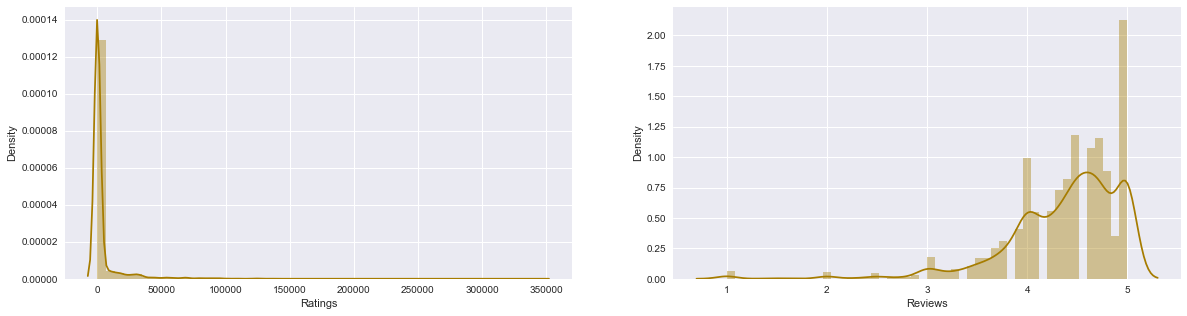

In [183]:
# plotting the distribution of the ratings and reviews column to know best fit for imputation
# Train data 
fig, ax = plt.subplots(1,2, figsize=(20,5))
sns.distplot(train_data['Ratings'], ax=ax[0])
sns.distplot(train_data['Reviews'], ax=ax[1])
plt.show()

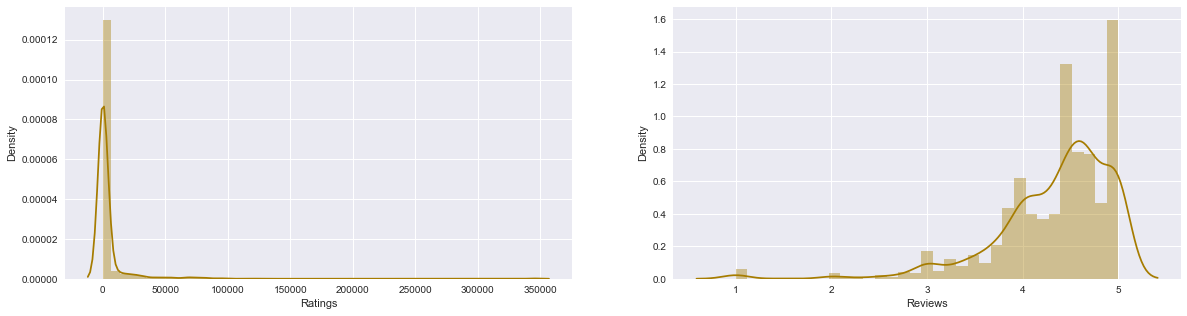

In [184]:
# test data 
fig, ax = plt.subplots(1,2, figsize=(20,5))
sns.distplot(test_data['Ratings'], ax=ax[0])
sns.distplot(test_data['Reviews'], ax=ax[1])
plt.show()

__For train dataset__
- _"Reviews" column is right skewed because there is out of range value  in it so we will impute it with median._ 
- _Skewness in "Rating" column is natural because it is a number of people who rated the book so we will not impute it._
  
__For test dataset__ 
- "Reviwes" column there is no actions needed because there is no out of range value in it. 

__Drop Duplicate values__ : before imputing the outliers we will drop the duplicate values. 

In [185]:
train_data.duplicated().sum() # to check for duplicate values

672

In [186]:
train_data.drop_duplicates(keep='first', inplace=True) # dropping duplicate values

In [187]:
train_data.loc[train_data['Reviews']>5.0,'Reviews'] = train_data['Reviews'].median() # imputing the reviews column with median value

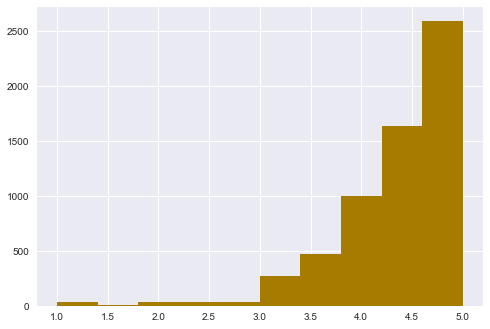

In [188]:
train_data['Reviews'].hist() # plotting the distribution of the reviews column after imputation
plt.show()

__Fill missing values__

In [189]:
# fill the missing values with median becathe distribution is heavly skewed 
train_data['Ratings'].fillna(train_data['Ratings'].median(), inplace=True) # filling the missing values with median in train data
train_data['Reviews'].fillna(train_data['Reviews'].median(), inplace=True) # filling the missing values with median in train data

test_data['Ratings'].fillna(test_data['Ratings'].median(), inplace=True) # filling the missing values with median in test data
test_data['Reviews'].fillna(test_data['Reviews'].median(), inplace=True) # filling the missing values with median in test data


In [190]:
# using IQR method to remove outliers in the price column :
Q1 = train_data['Price'].quantile(0.25)
Q3 = train_data['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR 
train_data.loc[(train_data['Price'] < lower_bound) | (train_data['Price'] > upper_bound),'Price'] = train_data['Price'].median() # imputing the outliers with median value

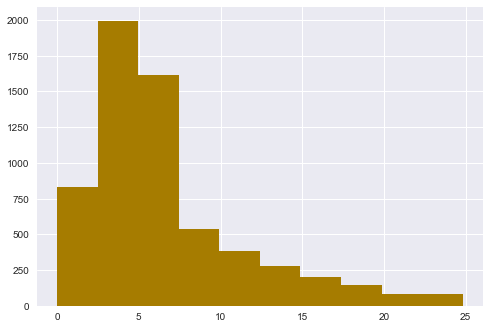

In [191]:
train_data['Price'].hist() # plotting the distribution of the price column after imputation
plt.show()

In [192]:
# for BookCategory column : 
train_data['BookCategory'].replace({np.nan:'Other'}, inplace=True) # replacing the missing values with 'Other' category 
test_data['BookCategory'].replace({np.nan:'Other'}, inplace=True) # replacing the missing values with 'Other' category

__check there is no missing values__

In [193]:
train_data.isna().sum() 

Reviews         0
Ratings         0
BookCategory    0
Price           0
dtype: int64

In [194]:
test_data.isna().sum() 

ID              0
Reviews         0
Ratings         0
BookCategory    0
dtype: int64

<div style='color: #666666;
           background-color: #e6ac00;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: Courier New;'>
Exploratory Data Analysis
<a class="anchor" id="1"></a> 


In [195]:
num_cols = train_data.select_dtypes(exclude='object').columns.to_list() # selecting numerical columns
sample_train = train_data.sample(1000) # taking a sample of 1000 rows from train data

In [196]:
(sample_train['Reviews']>5.0).sum()

0

<span style='color: #e6ac00;
           font-size: 120%;
           border-radius:10px;
           text-align:left;
           font-weight:600;
           padding-left: 20px;
           padding-right:20px;
           font-family: "Courier New";'>
Univariate Analysis

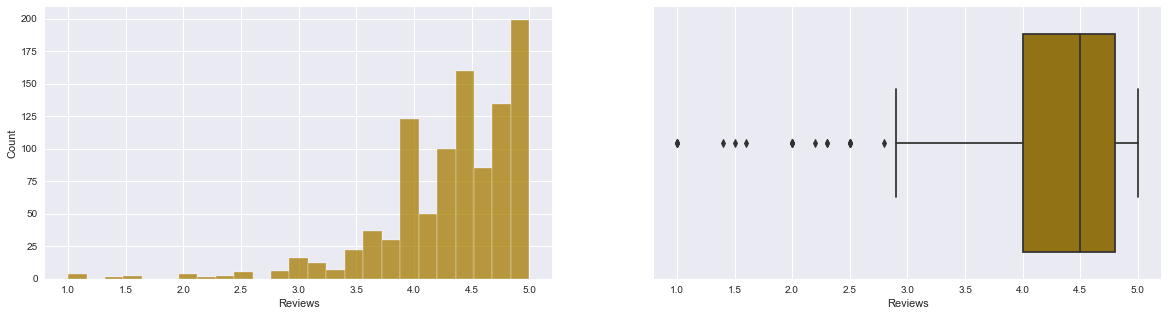

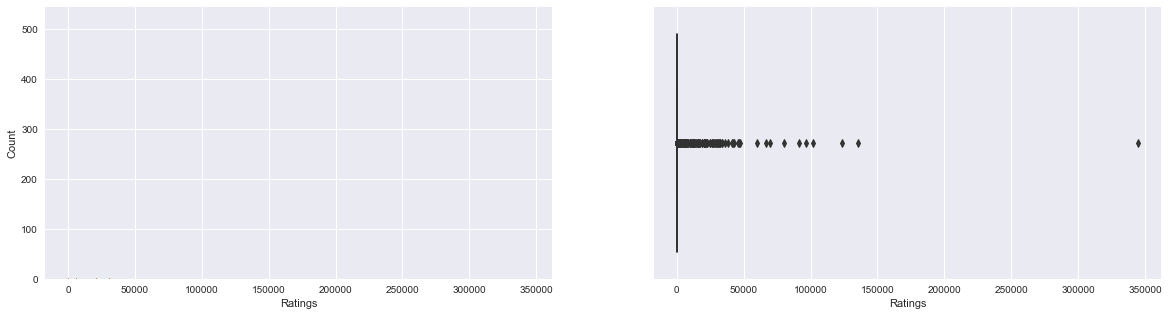

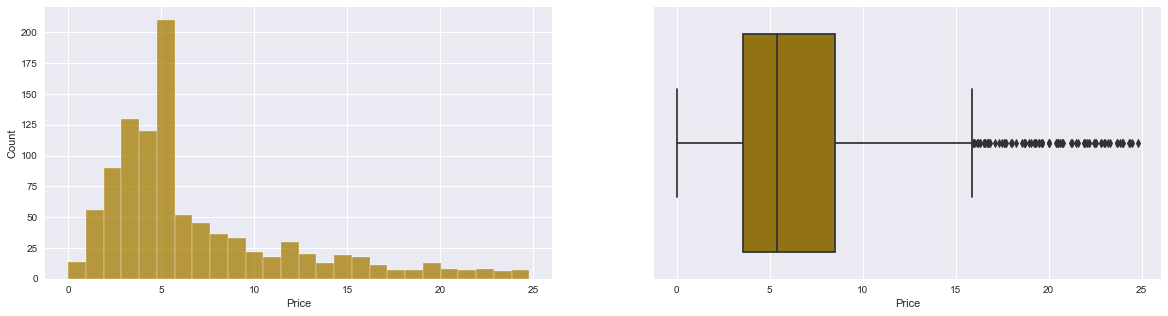

In [197]:
for col in num_cols:
    fig, ax = plt.subplots(1, 2, figsize = (20, 5))
    sns.histplot(sample_train[col], ax = ax[0])
    sns.boxplot(x = sample_train[col], ax= ax[1])

- _most columns are heavly skewed , we can use log transformation to make it normal distribution._

<span style='color: #e6ac00;
           font-size: 120%;
           border-radius:10px;
           text-align:left;
           font-weight:600;
           padding-left: 20px;
           padding-right:20px;
           font-family: "Courier New";'>
Bi-variate Analysis

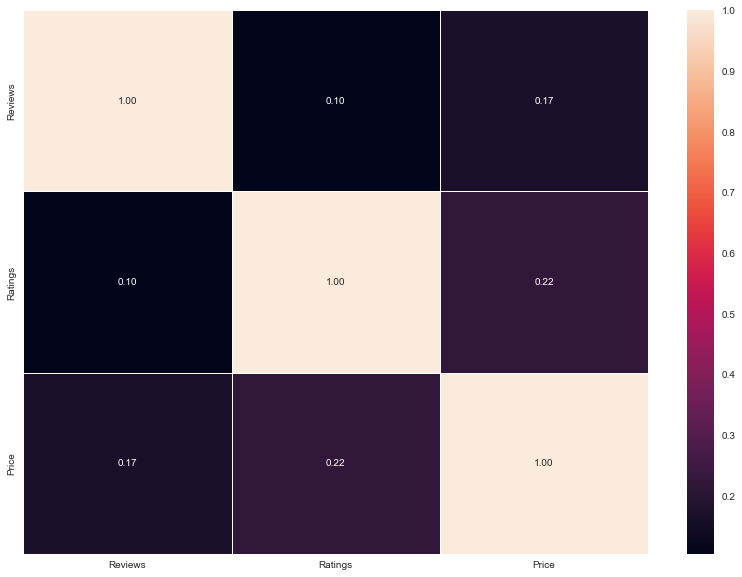

In [198]:
# correlation matrix between numerical columns
with sns.axes_style('white'):
    plt.figure(figsize= (14, 10))
    sns.heatmap(train_data.corr(), annot = True, fmt = '.2f', linewidths= 0.8) # type: ignore

- _there is no very strong correlation between variables so we will not drop any column._

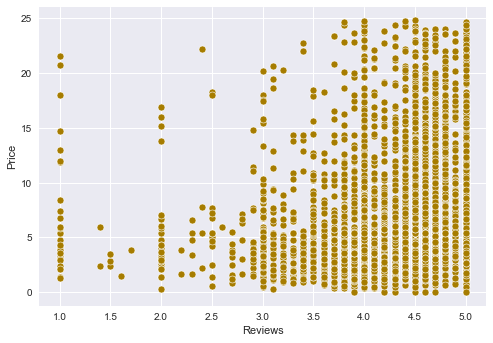

In [199]:
# scatter plot between 'Ratings' and 'Price' column to check the relationship between them
sns.scatterplot(x = 'Reviews', y = 'Price', data = train_data)
plt.show()

_there is multiple observations in each record so we will use line plot to see the relation between variables._

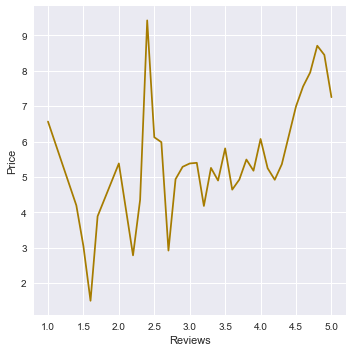

In [200]:
# line plot between 'Ratings' and 'Price' column to check the relationship between them
sns.relplot(x = 'Reviews', y = 'Price', data = train_data,kind='line',ci=None)
plt.show()

_there is weak correlation between "Price" and "Reviews"_

<div style='color: #666666;
           background-color: #e6ac00;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: Courier New;'>
Feature transformation & Encoding
<a class="anchor" id="1"></a> 


<span style='color: #e6ac00;
           font-size: 120%;
           border-radius:10px;
           text-align:left;
           font-weight:600;
           padding-left: 20px;
           padding-right:20px;
           font-family: "Courier New";'>
encoding

In [201]:
# convert the categorical columns to numerical columns using dummy encoding
train_data = pd.get_dummies(train_data, columns=['BookCategory'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['BookCategory'], drop_first=True)

<span style='color: #e6ac00;
           font-size: 120%;
           border-radius:10px;
           text-align:left;
           font-weight:600;
           padding-left: 20px;
           padding-right:20px;
           font-family: "Courier New";'>
feature transformation 

In [202]:
# lot of numerical columns are skewed so we will apply log transformation to reduce the skewness

# train data
train_data['Price'] = np.log1p(train_data['Price'])
train_data['Ratings'] = np.log1p(train_data['Ratings'])

# test data
test_data['Ratings'] = np.log1p(test_data['Ratings'])

In [1]:
commen_for_train= sorted(list(set(train_data.columns).intersection(set(test_data.columns))) + ['Price'])
commen_for_test = ['ID'] + sorted(list(set(train_data.columns).intersection(set(test_data.columns))) )

NameError: name 'train_data' is not defined

In [218]:
train = train_data[commen_for_train]
test = test_data[commen_for_test]

In [219]:
train.head()

,BookCategory_Action &amp,BookCategory_Amateur Sleuth,"BookCategory_Arts, Film & Photography",BookCategory_Autobiography,"BookCategory_Biographies, Diaries & True Accounts",BookCategory_Biography &amp,BookCategory_Business &amp,BookCategory_Classics,BookCategory_Comics & Graphic Novels,BookCategory_Comics & Mangas,BookCategory_Comics &amp,"BookCategory_Computing, Internet & Digital Media",BookCategory_Cozy,"BookCategory_Crime, Thriller & Mystery",BookCategory_Dark Fantasy,BookCategory_Detective,BookCategory_Dragons &amp,BookCategory_Economics,BookCategory_Epic,BookCategory_Fantasy,BookCategory_Fiction,BookCategory_General,BookCategory_Graphic Novels,BookCategory_Horror,BookCategory_Humor,BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Literary,BookCategory_Media Tie-In,BookCategory_Mentoring & Coaching,BookCategory_Motivational,BookCategory_Mystery &amp,BookCategory_Non Fiction,BookCategory_Other,BookCategory_Personal Finance,BookCategory_Philosophy,BookCategory_Poetry,BookCategory_Politics,BookCategory_Private Investigators,BookCategory_Psychological,BookCategory_Psychology,BookCategory_Romance,BookCategory_Science Fiction,BookCategory_Self-Esteem,BookCategory_Self-Help,BookCategory_Social Psychology,BookCategory_Social Science,BookCategory_Sports,BookCategory_Success,BookCategory_Superheroes,BookCategory_Suspense,BookCategory_Thrillers,BookCategory_War &amp,BookCategory_Women,Price,Ratings,Reviews
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.191495,0.693147,5.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.757858,6.163315,4.5
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.442347,2.772589,4.9
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.874874,3.970292,4.8
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.753711,1.098612,4.5


In [220]:
test.head()

,ID,BookCategory_Action &amp,BookCategory_Amateur Sleuth,"BookCategory_Arts, Film & Photography",BookCategory_Autobiography,"BookCategory_Biographies, Diaries & True Accounts",BookCategory_Biography &amp,BookCategory_Business &amp,BookCategory_Classics,BookCategory_Comics & Graphic Novels,BookCategory_Comics & Mangas,BookCategory_Comics &amp,"BookCategory_Computing, Internet & Digital Media",BookCategory_Cozy,"BookCategory_Crime, Thriller & Mystery",BookCategory_Dark Fantasy,BookCategory_Detective,BookCategory_Dragons &amp,BookCategory_Economics,BookCategory_Epic,BookCategory_Fantasy,BookCategory_Fiction,BookCategory_General,BookCategory_Graphic Novels,BookCategory_Horror,BookCategory_Humor,BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Literary,BookCategory_Media Tie-In,BookCategory_Mentoring & Coaching,BookCategory_Motivational,BookCategory_Mystery &amp,BookCategory_Non Fiction,BookCategory_Other,BookCategory_Personal Finance,BookCategory_Philosophy,BookCategory_Poetry,BookCategory_Politics,BookCategory_Private Investigators,BookCategory_Psychological,BookCategory_Psychology,BookCategory_Romance,BookCategory_Science Fiction,BookCategory_Self-Esteem,BookCategory_Self-Help,BookCategory_Social Psychology,BookCategory_Social Science,BookCategory_Sports,BookCategory_Success,BookCategory_Superheroes,BookCategory_Suspense,BookCategory_Thrillers,BookCategory_War &amp,BookCategory_Women,Ratings,Reviews
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5.631212,4.2
1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.091042,4.7
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.666427,4.3
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.302585,3.9
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.693147,4.0


In [ ]:
    # create new text file 
    
  
    